In [134]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from utils import *

In [98]:
path = 'activatable promoters/bl/txtl/'
file_d = path+'220224-newBL-v2_dark.csv' # CSV file with raw data (open .txt in Excel, save as .csv)
file_l = path+'220224-newBL-v2_light.csv' # CSV file with raw data (open .txt in Excel, save as .csv)

layout = path+'220224_newBL_PL.csv' # CSV file with plate layout

plate = pd.read_csv(layout, index_col = 0, dtype = str) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx_d = pd.read_csv(file_d, skiprows = 100, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows
RFPEx_l = pd.read_csv(file_l, skiprows = 100, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows


In [99]:
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append(i[0] + i[1])

In [100]:
exps.keys()

dict_keys(['A6', 'A11', 'C7', 'D7', 'LUX', '117', '115', 'BLANK'])

In [107]:
allm_d = []
alls_d = []
allm_l = []
alls_l = []

#for e in list(exps.keys())[:-2]:
for e in ['LUX', 'A11','C7','D7','A6']:
    allm_d.append(RFPEx_d[exps[e][:3]].mean().mean() - RFPEx_d[exps['BLANK']].mean().mean())
    alls_d.append((RFPEx_d[exps[e][:3]].mean().std()**2 + RFPEx_d[exps['BLANK']].mean().std()**2)**0.5)
    allm_l.append(RFPEx_l[exps[e]].mean().mean() - RFPEx_l[exps['BLANK']].mean().mean())
    alls_l.append((RFPEx_l[exps[e]].mean().std()**2 + RFPEx_l[exps['BLANK']].mean().std()**2)**0.5)
    

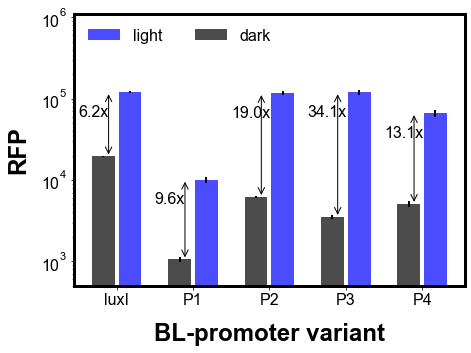

In [124]:
plt.figure(figsize=(7,5))
plt.bar(np.arange(len(allm_d))+0.175, allm_l, yerr = alls_l, color = 'b', alpha = 0.7, width = 0.3)
plt.bar(np.arange(len(allm_d))-0.175, allm_d, yerr = alls_d, color = 'k', alpha = 0.7, width = 0.3)
#plt.xticks(range(len(allm_d)), ['A6','A11','C7','D7','luxI','J23117','J23115'][:-1]);
plt.xticks(range(len(allm_d)), ['luxI','P1','P2','P3','P4']);


fc = np.array(allm_l) / np.array(allm_d)
for i in range(len(fc)):
    plt.text(i-0.5,allm_l[i]*0.5,'{x:.{d}f}x'.format(x=fc[i], d =1))
    plt.annotate("", xy=(i-0.105, allm_d[i]), xytext=(i-0.105, allm_l[i]),arrowprops=dict(arrowstyle="<->"))

plt.legend(['light','dark'], frameon = False, loc = 'upper left', ncol =2)
plt.ylim([5e2,110e4])
plt.yscale('log')
plt.ylabel('RFP', labelpad = 1.1*ypad, fontsize=24)
#plt.xlabel('minimal promoter', labelpad = xpad)
plt.xlabel('BL-promoter variant', labelpad = xpad, fontsize=24)
plt.savefig('screen_cfs.svg')

In [400]:
34/23

1.4782608695652173

In [136]:
path = 'activatable promoters/bl/txtl/'
file_d = path+'220313-BL-CRISPRi_J1RFP_dark.csv' # CSV file with raw data (open .txt in Excel, save as .csv)
file_l = path+'220313-BL-CRISPRi_J1RFP_light.csv' # CSV file with raw data (open .txt in Excel, save as .csv)

layout = path+'220313_BL-CRISPRi_J1RFP_PL.csv' # CSV file with plate layout

plate = pd.read_csv(layout, index_col = 0, dtype = str) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx_d = pd.read_csv(file_d, skiprows = 68, nrows = 108, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows
RFPEx_l = pd.read_csv(file_l, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows


In [137]:
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append(i[0] + i[1])
            
cnt = ['c_'+str(i) for i in range(1,8)]
rr2 = ['i_'+str(i) for i in range(1,11)]

In [138]:
x_cnt = [40,20,10,1,0.1,0.01,0.001]

cnt_m = []
cnt_s = []
for c in cnt:
    cnt_m.append(RFPEx_d[exps[c]].iloc[90].mean() - RFPEx_d[exps['blank']].iloc[90].mean())
    cnt_s.append((RFPEx_d[exps[c]].iloc[90].std()**2 + RFPEx_d[exps['blank']].iloc[90].std()**2)**0.5)


Text(0.002, 100000.0, 'linear regime')

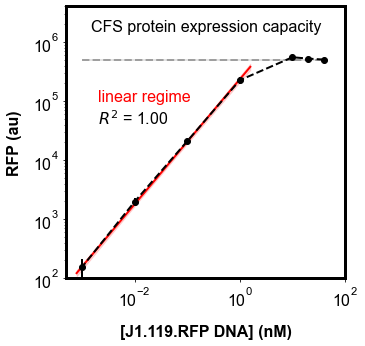

In [139]:
plt.figure(figsize=(5,5))
plt.errorbar(x_cnt, cnt_m, yerr=cnt_s, fmt = 'o--', color = 'k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('[J1.119.RFP DNA] (nM)', labelpad = xpad)
plt.ylabel('RFP (au)', labelpad = ypad*1.1)
#plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: '{:d}'.format(int(x/1000)) + '$_{000}$'))
plt.xlim([50e-5, 10e1])
plt.ylim([10e1, 40e5])

plt.plot([min(x_cnt), max(x_cnt)], [cnt_m[0]]*2, 'k--', alpha = 0.3)
plt.fill_between([min(x_cnt), max(x_cnt)], [cnt_m[0] - cnt_s[0]]*2, [cnt_m[0] + cnt_s[0]]*2,color = 'black', alpha = 0.07)
plt.text(15e-4,1500000,'CFS protein expression capacity')


import lmfit as lmf

x_fit = sum([[c,c,c] for c in x_cnt[3:]],[])
y_fit = sum([[m,m+s,m-s] for m,s in zip(cnt_m[3:],cnt_s[3:])],[])

mod = lmf.models.LinearModel()
pars = mod.guess(np.log10(y_fit), np.log10(x_fit))
out = mod.fit(np.log10(y_fit), pars, x=np.log10(x_fit), max_nfev = 500) # fit only to some points

xnew = np.linspace(-3.1,0.2)
ynew = out.eval(x=xnew)
yerr = out.eval_uncertainty(x = xnew)
plt.plot(10**xnew, 10**ynew, '-', color = 'r')
plt.fill_between(10**xnew, 10**(ynew-yerr), 10**(ynew+yerr),color = 'r', alpha = 0.15)

sst = ((y_fit-np.mean(y_fit))**2).sum()
rss = ((10**out.residual)**2).sum()
plt.text(20e-4,40e3,r'$R^2$ = {:.2f}'.format(1-rss/sst))
plt.text(20e-4,10e4,'linear regime', color = 'r')



In [140]:
from scipy.optimize import minimize

# inverse of fit to get new nM based on RFP
new_x = lambda y: 10**minimize(lambda x_try,y: (y-out.eval(x=x_try))**2, 1, np.log10(y)).x[0]

promoters = ['304','305','306','307','309','303']
leak_10 =[567.3333333333333, 595.0, 263.6666666666667, 370.6666666666667, 425.3333333333333, 186.0]
maxFC = np.array([622.5626320463067,403.2169466246997,1283.813594549234,731.9484063162078,680.3133111255344,1134.9998069656428])
target_nm = 10e-1/maxFC

x_eq = np.array([new_x(x) for x in leak_10])
new_nm = (target_nm/x_eq)*10
norm_nm = new_nm*20/new_nm.sum()

In [141]:
10e-4/x_eq*10

array([2.94916069, 2.81944801, 6.08228542, 4.40883834, 3.87154538,
       8.45713758])

In [142]:
x_eq

array([0.0033908 , 0.00354679, 0.00164412, 0.00226817, 0.00258295,
       0.00118243])

In [143]:
10e-2*(np.mean(10/x_eq))

476.4735903325872

In [144]:
x_cnt = [40,20,10,2.5,0.625,0.156,0.039,0.01,0.001,0]


rr2_md = []
rr2_sd = []
rr2_ml = []
rr2_sl = []
for c in rr2:
    rr2_md.append(RFPEx_d[exps[c][:-1]].iloc[90].mean() - RFPEx_d[exps['blank']].iloc[90].mean())
    rr2_sd.append((RFPEx_d[exps[c][:-1]].iloc[90].std()**2 + RFPEx_d[exps['blank']].iloc[90].std()**2)**0.5)
    rr2_ml.append(RFPEx_l[exps[c][:-1]].mean().mean() - RFPEx_l[exps['blank']].mean().mean())
    rr2_sl.append((RFPEx_l[exps[c][:-1]].mean().std()**2 + RFPEx_l[exps['blank']].mean().std()**2)**0.5)

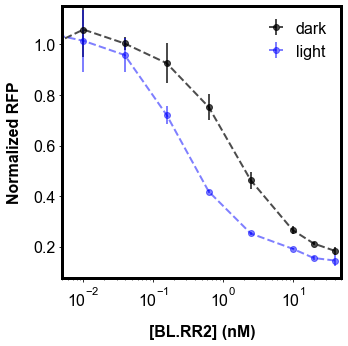

In [146]:
plt.figure(figsize=(5,5))

plt.errorbar(x_cnt[:],rr2_md[:]/rr2_md[-1],yerr =rr2_sd[:]/rr2_md[-1], color = 'k', alpha = 0.7, fmt='o--')
plt.errorbar(x_cnt[:],rr2_ml[:]/rr2_ml[-1],yerr =rr2_sl[:]/rr2_ml[-1], color = 'blue', alpha = 0.5, fmt='o--')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('[BL.RR2] (nM)', labelpad = xpad)
plt.ylabel('Normalized RFP', labelpad = ypad*1.1)
plt.ylim([0.075,1.15])
plt.xlim([50e-4, 50e0])
plt.legend(['dark','light'], frameon = False, handlelength = 0.9)

plt.savefig('bl-crispri.svg')

In [18]:
path = 'activatable promoters/bl/txtl/'
file_d = path+'220314-BL-CRISPRa_dark.csv' # CSV file with raw data (open .txt in Excel, save as .csv)
file_l = path+'220314-BL-CRISPRa_long.csv' # CSV file with raw data (open .txt in Excel, save as .csv)
file_s = path+'220314-BL-CRISPRa_short.csv' # CSV file with raw data (open .txt in Excel, save as .csv)

layout = path+'220314-BL-CRISPRa_PL.csv' # CSV file with plate layout

plate = pd.read_csv(layout, index_col = 0, dtype = str) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx_d = pd.read_csv(file_d, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows
RFPEx_s = pd.read_csv(file_s, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows
RFPEx_l = pd.read_csv(file_l, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows


In [19]:
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append(i[0] + i[1])
            

In [20]:
dark_m = {}
dark_s = {}
short_m = {}
short_s = {}
long_m = {}
long_s = {}
for e in exps.keys():
    
    dark_m[e] = RFPEx_d[exps[e][1:]].mean().mean() - RFPEx_d[exps['blank'][1:]].mean().mean()
    short_m[e] = RFPEx_s[exps[e][:-1]].mean().mean() - RFPEx_s[exps['blank'][:-1]].mean().mean()
    long_m[e] = RFPEx_l[exps[e][1:]].mean().mean() - RFPEx_l[exps['blank'][1:]].mean().mean()
    
    dark_s[e] = (RFPEx_d[exps[e][1:]].mean().std()**2 + RFPEx_d[exps['blank'][1:]].mean().std()**2)**0.5
    short_s[e] = (RFPEx_s[exps[e][:-1]].mean().std()**2 + RFPEx_s[exps['blank'][:-1]].mean().std()**2)**0.5
    long_s[e] = (RFPEx_l[exps[e][1:]].mean().std()**2 + RFPEx_l[exps['blank'][1:]].mean().std()**2)**0.5

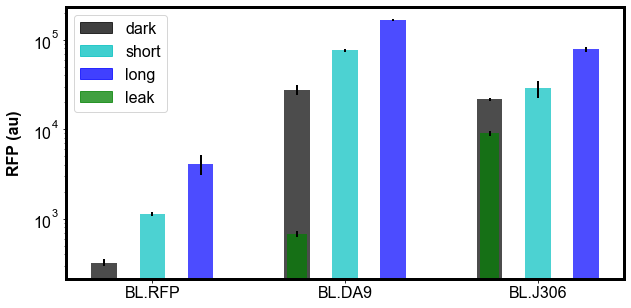

In [21]:
plt.figure(figsize=(10,5))
for k,e in enumerate(['cnt','a','a2','a_off','a2_off']):
    if e in ['cnt','a','a2']:
        plt.bar(np.array([0,0.75,1.5])+(3*k), [dark_m[e],short_m[e],long_m[e]], yerr = [dark_s[e],short_s[e],long_s[e]], color = ['k','c','b'], alpha = 0.7, width = 0.4, label = '_nolegend_')
    else:
        plt.bar(3*(k-2), [long_m[e]], yerr = [long_s[e]], color = ['g'], alpha = 0.7, width = 0.3, label = '_nolegend_')

        # plt.xticks(range(len(allm_d)), ['A6','A11','C7','D7','luxI','J23117','J23115'][:-1]);
        
handles = [plt.Rectangle((0,0),0,0, color=c, alpha = 0.75) for c in ['k','c','b','g']]
plt.legend(handles, ['dark','short','long','leak'], loc = 'upper left')

plt.ylabel('RFP (au)', labelpad = ypad*1.1)
plt.yscale('log')

plt.xticks([0.75, 3.75, 6.75], ['BL.RFP','BL.DA9', 'BL.J306']);


In [125]:
path = 'activatable promoters/bl/txtl/'
file_d = path+'220322-BL-CRISPRa-titration_dark.csv' # CSV file with raw data (open .txt in Excel, save as .csv)
file_l = path+'220322-BL-CRISPRa-titration_light.csv' # CSV file with raw data (open .txt in Excel, save as .csv)

layout = path+'220322-BL-CRISPRa-titrations_PL.csv' # CSV file with plate layout

plate = pd.read_csv(layout, index_col = 0, dtype = str) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx_d = pd.read_csv(file_d, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows
RFPEx_l = pd.read_csv(file_l, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows


In [126]:
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append(i[0] + i[1])
            

In [127]:
x_cnt = [20,10,2.5,0.625,0.156,0.039,0.01,0.001,0]


a_md = []
a_sd = []
a_ml = []
a_sl = []
for c in exps:
    a_md.append(RFPEx_d[exps[c][:-1]].mean().mean() - RFPEx_d[exps['blank']].mean().mean())
    a_sd.append((RFPEx_d[exps[c][:-1]].mean().std()**2 + RFPEx_d[exps['blank']].mean().std()**2)**0.5)
    a_ml.append(RFPEx_l[exps[c][:-1]].mean().mean() - RFPEx_l[exps['blank']].mean().mean())
    a_sl.append((RFPEx_l[exps[c][:-1]].mean().std()**2 + RFPEx_l[exps['blank']].mean().std()**2)**0.5)

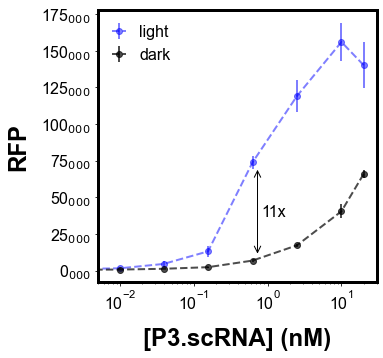

In [133]:
plt.figure(figsize=(5,5))
plt.errorbar(x_cnt[:],a_ml[:-1],yerr =a_sl[:-1], color = 'blue', alpha = 0.5, fmt='o--')
plt.errorbar(x_cnt[:],a_md[:-1],yerr =a_sd[:-1], color = 'k', alpha = 0.7, fmt='o--')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('[P3.scRNA] (nM)', labelpad = xpad, fontsize=24)
plt.ylabel('RFP', labelpad = ypad*1.1, fontsize=24)
#plt.ylim([0.075,1.15])
plt.xlim([50e-4, 30e0])
plt.legend(['light','dark'], frameon = False, handlelength = 0.9)

fc = a_ml[3]/a_md[3]
plt.text(x_cnt[3]+0.2,a_ml[3]*0.5,'{x:.{d}f}x'.format(x=fc, d =0))
plt.annotate("", xy=(x_cnt[3]+0.105, a_md[3]*1.5), xytext=(x_cnt[3]+0.105, a_ml[3]*0.95),arrowprops=dict(arrowstyle="<->"))
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: '{:d}'.format(int(x/1000)) + '$_{000}$'))

plt.savefig('bl-crispra.svg')

In [28]:
[a/b for a,b in zip(a_ml,a_md)]

[2.1266877912112108,
 3.8608984070241195,
 6.9258506831647635,
 10.911434065527697,
 5.751598676957001,
 3.830246473856675,
 2.3579263515278144,
 1.458881024603977,
 1.446944749359678,
 34.071428571428015]

In [29]:
exps

{'a_1': ['D2', 'E2', 'F2', 'G2'],
 'a_2': ['D3', 'E3', 'F3', 'G3'],
 'a_3': ['D4', 'E4', 'F4', 'G4'],
 'a_4': ['D5', 'E5', 'F5', 'G5'],
 'a_5': ['D6', 'E6', 'F6', 'G6'],
 'a_6': ['D7', 'E7', 'F7', 'G7'],
 'a_7': ['D8', 'E8', 'F8', 'G8'],
 'a_8': ['D9', 'E9', 'F9', 'G9'],
 'a_9': ['D10', 'E10', 'F10', 'G10'],
 'blank': ['D11', 'E11', 'F11', 'G11']}

In [796]:
path = 'activatable promoters/bl/txtl/'
file_d = path+'220323-BL-CRISPRa-el222_dark.csv' # CSV file with raw data (open .txt in Excel, save as .csv)
file_l = path+'220323-BL-CRISPRa-el222_light.csv' # CSV file with raw data (open .txt in Excel, save as .csv)

layout = path+'220323-BL-CRISPRa-el222_PL.csv' # CSV file with plate layout

plate = pd.read_csv(layout, index_col = 0, dtype = str) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx_d = pd.read_csv(file_d, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows
RFPEx_l = pd.read_csv(file_l, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows


In [797]:
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append(i[0] + i[1])
            

In [798]:
e_x = [84,42,21,10.5,5.25,0]
p_x = [1, 0.25, 0.063, 0.004,.001,0.]

a_md = []
a_sd = []
a_ml = []
a_sl = []
for c in exps:
    a_md.append(RFPEx_d[exps[c]].T.nlargest(3,0).mean()[0] - RFPEx_d[exps['blank']].mean().mean())
    a_sd.append((RFPEx_d[exps[c]].T.nlargest(3,0).std()[0]**2 + RFPEx_d[exps['blank']].mean().std()**2)**0.5)
    a_ml.append(RFPEx_l[exps[c]].T.nlargest(3,0).mean()[0] - RFPEx_l[exps['blank'][:-1]].mean().mean())
    a_sl.append((RFPEx_l[exps[c]].T.nlargest(3,0).std()[0]**2 + RFPEx_l[exps['blank'][:-1]].mean().std()**2)**0.5)

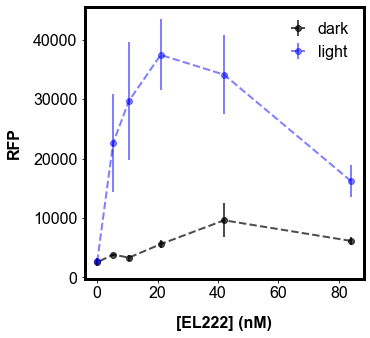

In [803]:
plt.figure(figsize=(5,5))

plt.errorbar(e_x[:],a_md[:6],yerr =a_sd[:6], color = 'k', alpha = 0.7, fmt='o--')
plt.errorbar(e_x[:],a_ml[:6],yerr =a_sl[:6], color = 'blue', alpha = 0.5, fmt='o--')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('[EL222] (nM)', labelpad = xpad)
plt.ylabel('RFP', labelpad = ypad*1.1)
#plt.ylim([0.075,1.15])
#plt.xlim([50e-4, 30e0])
plt.legend(['dark','light'], frameon = False, handlelength = 0.9)

# fc = a_ml[3]/a_md[3]
# plt.text(e_x[3]+5.2,a_ml[3]*0.5,'{x:.{d}f}x'.format(x=fc, d =2))
# plt.annotate("", xy=(e_x[3]+5.105, a_md[3]*1.5), xytext=(e_x[3]+5.105, a_ml[3]*0.95),arrowprops=dict(arrowstyle="<->"))


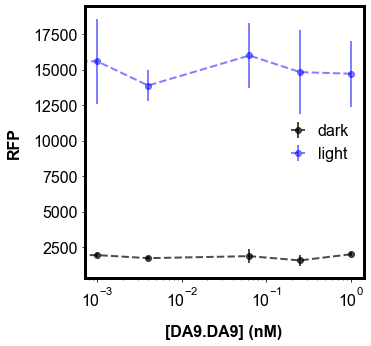

In [664]:
plt.figure(figsize=(5,5))

plt.errorbar(p_x[:],a_md[8:],yerr =a_sd[8:], color = 'k', alpha = 0.7, fmt='o--')
plt.errorbar(p_x[:],a_ml[8:],yerr =a_sl[8:], color = 'blue', alpha = 0.5, fmt='o--')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('[DA9.DA9] (nM)', labelpad = xpad)
plt.ylabel('RFP', labelpad = ypad*1.1)
#plt.ylim([0.075,1.15])
#plt.xlim([50e-4, 30e0])
plt.legend(['dark','light'], frameon = False, handlelength = 0.9, loc = 'center right')

# fc = a_ml[3]/a_md[3]
# plt.text(e_x[3]+6.2,a_ml[3]*0.5,'{x:.{d}f}x'.format(x=fc, d =0))
# plt.annotate("", xy=(e_x[3]+5.105, a_md[3]*1.5), xytext=(e_x[3]+5.105, a_ml[3]*0.95),arrowprops=dict(arrowstyle="<->"))


In [147]:
path = 'activatable promoters/bl/txtl/'
file_d = path+'220324-BL-CRISPRa-pfb_dark.csv' # CSV file with raw data (open .txt in Excel, save as .csv)
file_l = path+'220324-BL-CRISPRa-pfb_light.csv' # CSV file with raw data (open .txt in Excel, save as .csv)

layout = path+'220323-BL-CRISPRa-el222_PL.csv' # CSV file with plate layout

plate = pd.read_csv(layout, index_col = 0, dtype = str) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx_d = pd.read_csv(file_d, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows
RFPEx_l = pd.read_csv(file_l, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows


In [148]:
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append(i[0] + i[1])
            

In [149]:
e_x = [42,21,10.5,5.25,2.12,0]
p_x = [35,20,10,5,2.5,1.25,0.625]

a_md = []
a_sd = []
a_ml = []
a_sl = []
for c in exps:
    a_md.append(RFPEx_d[exps[c]].T.nlargest(3,0).mean()[0] - RFPEx_d[exps['blank']].mean().mean())
    a_sd.append((RFPEx_d[exps[c]].T.nlargest(3,0).std()[0]**2 + RFPEx_d[exps['blank']].mean().std()**2)**0.5)
    a_ml.append(RFPEx_l[exps[c]].T.nlargest(3,0).mean()[0] - RFPEx_l[exps['blank'][:-1]].mean().mean())
    a_sl.append((RFPEx_l[exps[c]].T.nlargest(3,0).std()[0]**2 + RFPEx_l[exps['blank'][:-1]].mean().std()**2)**0.5)

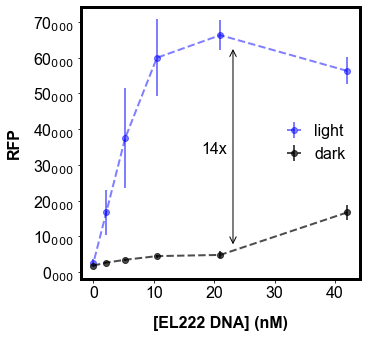

In [150]:
plt.figure(figsize=(5,5))

plt.errorbar(e_x[:],a_ml[:6],yerr =a_sl[:6], color = 'blue', alpha = 0.5, fmt='o--')
plt.errorbar(e_x[:],a_md[:6],yerr =a_sd[:6], color = 'k', alpha = 0.7, fmt='o--')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('[EL222 DNA] (nM)', labelpad = xpad)
plt.ylabel('RFP', labelpad = ypad*1.1)
#plt.ylim([0.075,1.15])
#plt.xlim([50e-4, 30e0])
plt.legend(['light','dark'], frameon = False, handlelength = 0.9)

fc = a_ml[1]/a_md[1]
plt.text(e_x[1]-3.2,a_ml[1]*0.5,'{x:.{d}f}x'.format(x=fc, d =0))
plt.annotate("", xy=(e_x[1]+2.105, a_md[1]*1.5), xytext=(e_x[1]+2.105, a_ml[1]*0.95),arrowprops=dict(arrowstyle="<->"))
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: '{:d}'.format(int(x/1000)) + '$_{000}$'))
plt.savefig('EL222_data.svg')

(-1000.0, 150000.0)

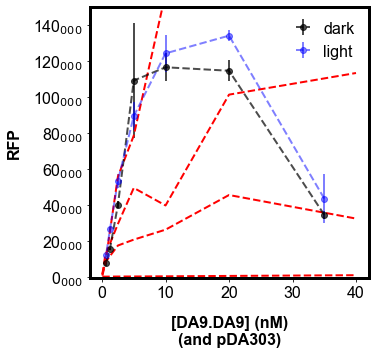

In [734]:
plt.figure(figsize=(5,5))

plt.errorbar(p_x[:],a_md[7:],yerr =a_sd[7:], color = 'k', alpha = 0.7, fmt='o--')
plt.errorbar(p_x[:],a_ml[7:],yerr =a_sl[7:], color = 'blue', alpha = 0.5, fmt='o--')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('[DA9.DA9] (nM)\n(and pDA303)', labelpad = xpad)
plt.ylabel('RFP', labelpad = ypad*1.1)
#plt.ylim([0.075,1.15])
#plt.xlim([50e-4, 30e0])
plt.legend(['dark','light'], frameon = False, handlelength = 0.9)
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: '{:d}'.format(int(x/1000)) + '$_{000}$'))

# fc = a_ml[3]/a_md[3]
# plt.text(e_x[3]+6.2,a_ml[3]*0.5,'{x:.{d}f}x'.format(x=fc, d =0))
# plt.annotate("", xy=(e_x[3]+5.105, a_md[3]*1.5), xytext=(e_x[3]+5.105, a_ml[3]*0.95),arrowprops=dict(arrowstyle="<->"))

plt.plot(x,high,'r--')
plt.plot(x,off,'r--')
plt.plot(x,low,'r--')
plt.plot(x,med,'r--')

plt.ylim([-1000,150000])

In [733]:
x = np.flip([40,20,10,5,2.5,0.5,0.05])
high = np.array([   561.33333333,   7043.66666667,  55580.66666667,  78389.        ,
       157242.        , 257725.66666667, 277206.33333333])

off = np.array([ 25.        , -18.66666667,  46.66666667,  67.33333333,
       157.        , 375.        , 775.33333333])
low = np.array([ 1388.66666667,  7916.33333333, 17276.33333333, 20544.33333333,
       26074.        , 45324.33333333, 32242.        ])
med = np.array([  1162.33333333,  11759.        ,  29251.33333333,  49274.33333333,
        39516.        , 101092.33333333, 113110.        ])

In [ ]:
220329-BL-CRISPRa_pfbv2_light

In [811]:
path = 'activatable promoters/bl/txtl/'
file_d = path+'220329-BL-CRISPRa_pfbv2_dark.csv' # CSV file with raw data (open .txt in Excel, save as .csv)
file_l = path+'220329-BL-CRISPRa_pfbv2_light.csv' # CSV file with raw data (open .txt in Excel, save as .csv)

layout = path+'220329-BL-CRISPRa_pfbv2_PL.csv' # CSV file with plate layout

plate = pd.read_csv(layout, index_col = 0, dtype = str) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx_d = pd.read_csv(file_d, skiprows = 72, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows
RFPEx_l = pd.read_csv(file_l, skiprows = 72, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows


In [812]:
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append(i[0] + i[1])
            

In [813]:
p_x = [10,7.5,5,2.5,1,0]

a_md = []
a_sd = []
a_ml = []
a_sl = []
for c in exps:
    a_md.append(RFPEx_d[exps[c]].T.nlargest(3,0).mean()[0] - RFPEx_d[exps['blank']].mean().mean())
    a_sd.append((RFPEx_d[exps[c]].T.nlargest(3,0).std()[0]**2 + RFPEx_d[exps['blank']].mean().std()**2)**0.5)
    a_ml.append(RFPEx_l[exps[c]].T.nlargest(3,0).mean()[0] - RFPEx_l[exps['blank'][:-1]].mean().mean())
    a_sl.append((RFPEx_l[exps[c]].T.nlargest(3,0).std()[0]**2 + RFPEx_l[exps['blank'][:-1]].mean().std()**2)**0.5)

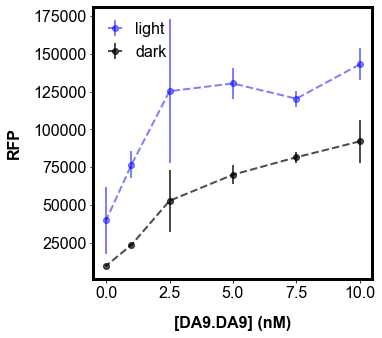

In [814]:
plt.figure(figsize=(5,5))

plt.errorbar(p_x[:],a_ml[:6],yerr =a_sl[:6], color = 'blue', alpha = 0.5, fmt='o--')
plt.errorbar(p_x[:],a_md[:6],yerr =a_sd[:6], color = 'k', alpha = 0.7, fmt='o--')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('[DA9.DA9] (nM)', labelpad = xpad)
plt.ylabel('RFP', labelpad = ypad*1.1)
#plt.ylim([0.075,1.15])
#plt.xlim([50e-4, 30e0])
plt.legend(['light','dark'], frameon = False, handlelength = 0.9)

# fc = a_ml[1]/a_md[1]
# plt.text(e_x[1]-3.2,a_ml[1]*0.5,'{x:.{d}f}x'.format(x=fc, d =0))
# plt.annotate("", xy=(e_x[1]+2.105, a_md[1]*1.5), xytext=(e_x[1]+2.105, a_ml[1]*0.95),arrowprops=dict(arrowstyle="<->"))


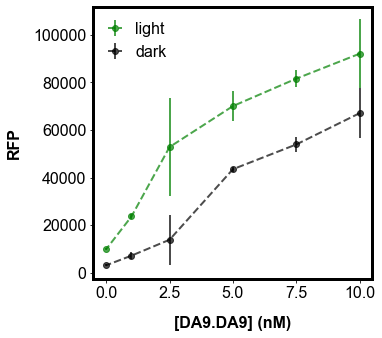

In [815]:
plt.figure(figsize=(5,5))

plt.errorbar(p_x[:],a_md[:6],yerr =a_sd[:6], color = 'g', alpha = 0.7, fmt='o--')
plt.errorbar(p_x[:],np.array(a_md[7:])[[4,5,0,1,2,3]],yerr =np.array(a_sd[7:])[[4,5,0,1,2,3]], color = 'k', alpha = 0.7, fmt='o--')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('[DA9.DA9] (nM)', labelpad = xpad)
plt.ylabel('RFP', labelpad = ypad*1.1)
#plt.ylim([0.075,1.15])
#plt.xlim([50e-4, 30e0])
plt.legend(['light','dark'], frameon = False, handlelength = 0.9)

# fc = a_ml[1]/a_md[1]
# plt.text(e_x[1]-3.2,a_ml[1]*0.5,'{x:.{d}f}x'.format(x=fc, d =0))
# plt.annotate("", xy=(e_x[1]+2.105, a_md[1]*1.5), xytext=(e_x[1]+2.105, a_ml[1]*0.95),arrowprops=dict(arrowstyle="<->"))


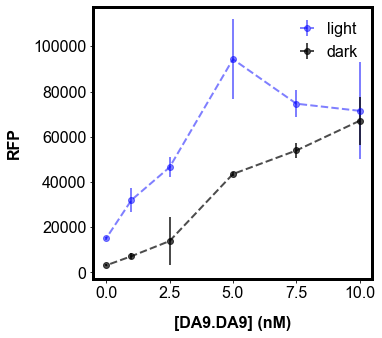

In [816]:
plt.figure(figsize=(5,5))

plt.errorbar(p_x[:],np.array(a_ml[7:])[[4,5,0,1,2,3]],yerr =np.array(a_sl[7:])[[4,5,0,1,2,3]], color = 'blue', alpha = 0.5, fmt='o--')
plt.errorbar(p_x[:],np.array(a_md[7:])[[4,5,0,1,2,3]],yerr =np.array(a_sd[7:])[[4,5,0,1,2,3]], color = 'k', alpha = 0.7, fmt='o--')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('[DA9.DA9] (nM)', labelpad = xpad)
plt.ylabel('RFP', labelpad = ypad*1.1)
#plt.ylim([0.075,1.15])
#plt.xlim([50e-4, 30e0])
plt.legend(['light','dark'], frameon = False, handlelength = 0.9)

# fc = a_ml[1]/a_md[1]
# plt.text(e_x[1]-3.2,a_ml[1]*0.5,'{x:.{d}f}x'.format(x=fc, d =0))
# plt.annotate("", xy=(e_x[1]+2.105, a_md[1]*1.5), xytext=(e_x[1]+2.105, a_ml[1]*0.95),arrowprops=dict(arrowstyle="<->"))


In [846]:
path = 'activatable promoters/bl/txtl/'
file_d = path+'220411-BL-CRISPRa-pfbv3_dark.csv' # CSV file with raw data (open .txt in Excel, save as .csv)
file_l = path+'220411-BL-CRISPRa-pfbv3_light.csv' # CSV file with raw data (open .txt in Excel, save as .csv)

layout = path+'220411-BL-CRISPRa-pfbv3_PL.csv' # CSV file with plate layout

plate = pd.read_csv(layout, index_col = 0, dtype = str) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx_d = pd.read_csv(file_d, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows
RFPEx_l = pd.read_csv(file_l, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows


In [847]:
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append(i[0] + i[1])
            

In [875]:
p_x = [6,3,1.5,0.75,0.375,0.188,0.094,0.047,0.000]

a_md = []
a_sd = []
a_ml = []
a_sl = []
for c in ['p'+str(i) for i in range(1,10)]:
    a_md.append(RFPEx_d[exps[c]].T.nlargest(3,0).mean()[0] - RFPEx_d[exps['blank']].mean().mean())
    a_sd.append((RFPEx_d[exps[c]].T.nlargest(3,0).std()[0]**2 + RFPEx_d[exps['blank']].mean().std()**2)**0.5)
    a_ml.append(RFPEx_l[exps[c]].T.nlargest(3,0).mean()[0] - RFPEx_l[exps['blank'][:-1]].mean().mean())
    a_sl.append((RFPEx_l[exps[c]].T.nlargest(3,0).std()[0]**2 + RFPEx_l[exps['blank'][:-1]].mean().std()**2)**0.5)

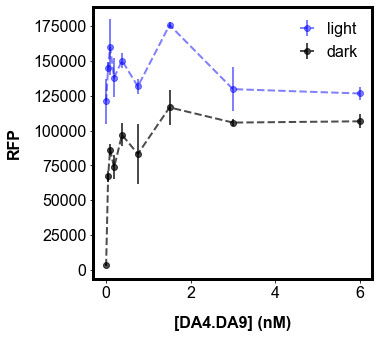

In [877]:
plt.figure(figsize=(5,5))

plt.errorbar(p_x[:],a_ml,yerr =a_sl, color = 'blue', alpha = 0.5, fmt='o--')
plt.errorbar(p_x[:],a_md,yerr =a_sd, color = 'k', alpha = 0.7, fmt='o--')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('[DA4.DA9] (nM)', labelpad = xpad)
plt.ylabel('RFP', labelpad = ypad*1.1)
#plt.ylim([0.075,1.15])
#plt.xlim([50e-4, 30e0])
plt.legend(['light','dark'], frameon = False, handlelength = 0.9)



In [93]:
path = 'activatable promoters/bl/txtl/cascade/'
file_d = path+'220414-BL-cascade_dark.csv' # CSV file with raw data (open .txt in Excel, save as .csv)
file_l = path+'220414-BL-cascade_light.csv' # CSV file with raw data (open .txt in Excel, save as .csv)

layout = path+'220414_BL-cascade_PL.csv' # CSV file with plate layout

plate = pd.read_csv(layout, index_col = 0, dtype = str) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx_d = pd.read_csv(file_d, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows
RFPEx_l = pd.read_csv(file_l, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows


In [94]:
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append(i[0] + i[1])
            

In [101]:
RFPEx_l[exps['m_4']]

,A8,B8,C8,D8
0,567,647,562,590


In [109]:
m_d = {}
m_l = {}
for c in 'ihml':
    m_d[c] = np.array([])
    m_l[c] = np.array([])

    for i in range(1,5):
        m_d[c] = np.append(m_d[c], RFPEx_d[exps[c+'_'+str(i)]].T.nlargest(3,0).mean(1)[0]-RFPEx_d[exps['blank']].T.nlargest(3,0).mean(1)[0])
        m_l[c] = np.append(m_l[c], RFPEx_l[exps[c+'_'+str(i)]].T.nlargest(3,0).mean(1)[0]-RFPEx_l[exps['blank']].T.nlargest(3,0).mean(1)[0])

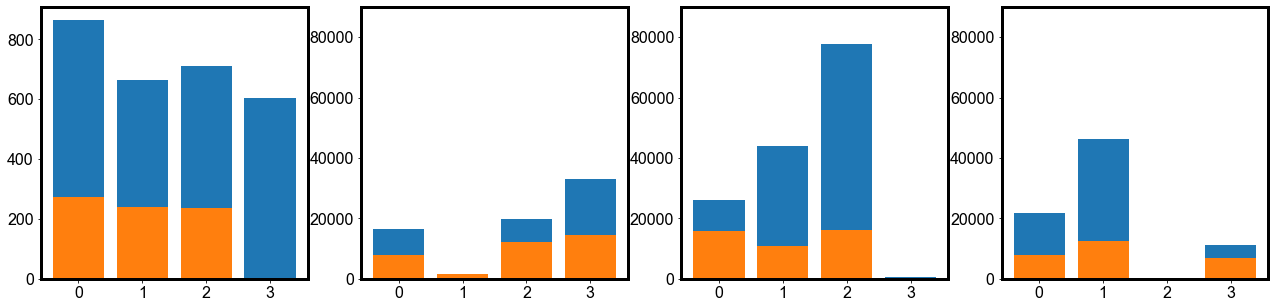

In [126]:
plt.figure(figsize=(22,5))
for i,c in enumerate('ilmh'):
    plt.subplot(1,4,i+1)
    plt.bar(range(4),m_l[c])
    plt.bar(range(4),m_d[c])
    if i>0:
        plt.ylim([0,90000])

C:\Users\Diego Alba\.conda\envs\txtl-sim\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


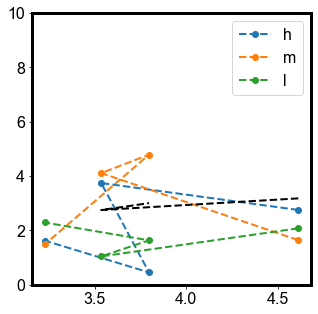

In [123]:
x_i = [0.6,0.2,0.07, 0.02]
plt.figure(figsize=(5,5))
for c in 'hml':
    plt.plot(m_l['i']/np.mean(m_d['i']),m_l[c]/m_d[c],'o--', label = c)
    
plt.plot(m_l['i']/np.mean(m_d['i']),m_l['i']/m_d['i'],'k--')
plt.ylim([0,10])
#plt.xlim([0,0.6])
plt.legend()
#plt.xscale('log')

In [42]:
path = 'activatable promoters/bl/txtl/cascade/'
file_d = path+'220419-BL-cascade-v3_dark.csv' # CSV file with raw data (open .txt in Excel, save as .csv)
file_l = path+'220419-BL-cascade-v3_light.csv' # CSV file with raw data (open .txt in Excel, save as .csv)

layout = path+'220419_BL-cascade-v3_PL.csv' # CSV file with plate layout

plate = pd.read_csv(layout, index_col = 0, dtype = str) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx_d = pd.read_csv(file_d, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows
RFPEx_l = pd.read_csv(file_l, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows


In [43]:
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append(i[0] + i[1])
            

In [44]:
exps

{'c2_1': ['A2', 'A3', 'A4', 'A5'],
 'c1_1': ['A6', 'A7', 'A8', 'G12'],
 'c2_2': ['B1', 'B3', 'B4', 'B5'],
 'c1_2': ['B6', 'B7', 'B8', 'G11'],
 'c2_3': ['C2', 'C3', 'C4', 'C5'],
 'c1_3': ['C6', 'C7', 'C8', 'G10'],
 'c0_1': ['C9', 'C10', 'C11', 'C12'],
 'c2_4': ['D2', 'D3', 'D4', 'D5'],
 'c1_4': ['D6', 'D7', 'D8', 'G9'],
 'TJ1': ['D9', 'D10', 'D11', 'D12'],
 'c2_5': ['E2', 'E3', 'E4', 'E5'],
 'c1_5': ['E6', 'E7', 'E8', 'G8'],
 'blank': ['E9', 'E10', 'E11', 'E12'],
 'c2_6': ['F2', 'F3', 'F4', 'F5'],
 'c1_6': ['F6', 'F7', 'F8', 'F9']}

<BarContainer object of 2 artists>

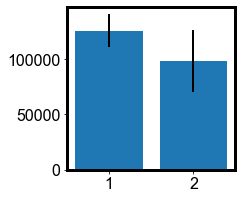

In [45]:
plt.figure(figsize =(3,3))
plt.bar([1,2],[RFPEx_d[exps['TJ1']].T.nlargest(3,0).mean()[0], RFPEx_l[exps['TJ1']].T.nlargest(3,0).mean()[0]], yerr = [RFPEx_d[exps['TJ1']].T.nlargest(3,0).std()[0], RFPEx_l[exps['TJ1']].T.nlargest(3,0).std()[0]])

In [46]:
p_x = [0.6,0.2,0.067,0.022,0.007,0.0007]


a_md = {}
a_sd = {}
a_ml = {}
a_sl = {}
for c in ['c2','c1','c0']:
    a_md[c] = np.array([])
    a_sd[c] = np.array([])
    a_ml[c] = np.array([])
    a_sl[c] = np.array([])
    for i in range(1,7):
        try:
            a_md[c] = np.append(a_md[c],RFPEx_d[exps[c+'_'+str(i)]].T.nlargest(3,0).mean()[0] - RFPEx_d[exps['blank']].mean().mean())
            a_sd[c] = np.append(a_sd[c],(RFPEx_d[exps[c+'_'+str(i)]].T.nlargest(3,0).std()[0]**2 + RFPEx_d[exps['blank']].mean().std()**2)**0.5)
            a_ml[c] = np.append(a_ml[c],RFPEx_l[exps[c+'_'+str(i)]].T.nlargest(3,0).mean()[0] - RFPEx_l[exps['blank'][:-1]].mean().mean())
            a_sl[c] = np.append(a_sl[c],(RFPEx_l[exps[c+'_'+str(i)]].T.nlargest(3,0).std()[0]**2 + RFPEx_l[exps['blank'][:-1]].mean().std()**2)**0.5)
        except:
            pass

(0.0004993963679968575, 0.8410153275336657)

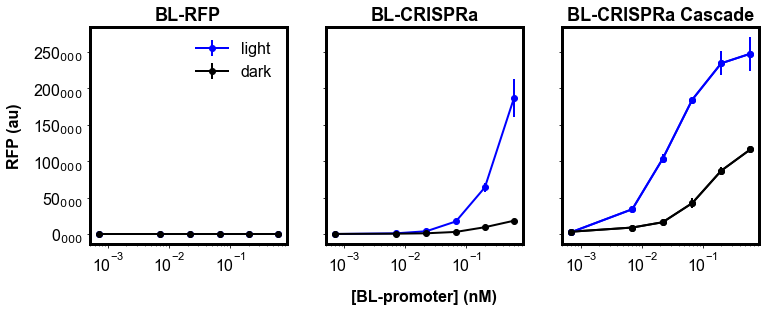

In [49]:
f,ax = plt.subplots(1,3, figsize = (12,4), sharey = True)

ax[0].errorbar(p_x,[*1.2*a_ml['c0']]*6,yerr= [*a_sl['c0']]*6,fmt='bo-')
ax[0].errorbar(p_x,[*a_md['c0']]*6,yerr= [*a_sd['c0']]*6,fmt='ko-')
ax[0].set_xscale('log')

ax[2].errorbar(p_x,1.2*a_ml['c2'],yerr= a_sl['c2'],fmt='bo-')
ax[2].errorbar(p_x,a_md['c2'],yerr= a_sd['c2'],fmt='ko-')
ax[2].set_xscale('log')
ax[1].errorbar(p_x,1.2*a_ml['c1'],yerr= a_sl['c1'],fmt='bo-')
ax[1].errorbar(p_x,a_md['c1'],yerr= a_sd['c1'],fmt='ko-')
ax[1].set_xscale('log')

ax[2].errorbar(p_x,1.2*a_ml['c2'],yerr= a_sl['c2'],fmt='bo-')
ax[2].errorbar(p_x,a_md['c2'],yerr= a_sd['c2'],fmt='ko-')
ax[2].set_xscale('log')

ax[0].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: '{:d}'.format(int(x/1000)) + '$_{000}$'))

ax[0].set_ylabel('RFP (au)',labelpad = ypad*1.1)
[ax[1].set_xlabel('[BL-promoter] (nM)',labelpad = xpad) for i in range(3)]
[ax[i].set_title(t, fontsize = 18) for i,t in zip(range(3),['BL-RFP','BL-CRISPRa','BL-CRISPRa Cascade'])]
ax[0].legend(['light','dark'], frameon = False)
# plt.errorbar(p_x[1],1.2*a_ml['c0'],yerr= a_sl['c0'],fmt='go-')
# plt.errorbar(p_x[1],a_md['c0'],yerr= a_sd['c0'],fmt='go-')

#plt.xscale('log')

In [318]:
1.2*a_ml['c2']/a_md['c2']

array([2.12819927, 2.69015366, 4.32214214, 6.27126474, 3.72295153,
       0.82771458])

In [292]:
path = 'activatable promoters/bl/txtl/cascade/'
file_d = path+'220420-BL-CRISPRa-v4_dark.csv' # CSV file with raw data (open .txt in Excel, save as .csv)
file_l = path+'220420-BL-CRISPRa-v4_light.csv' # CSV file with raw data (open .txt in Excel, save as .csv)

layout = path+'220420_BL-cascade-v4_PL.csv' # CSV file with plate layout

plate = pd.read_csv(layout, index_col = 0, dtype = str) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx_d = pd.read_csv(file_d, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows
RFPEx_l = pd.read_csv(file_l, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows


In [293]:
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append(i[0] + i[1])
            

In [295]:
exps

{'cH_1': ['A1', 'A2', 'B1', 'B2', 'C1', 'C2', 'D1', 'D2'],
 'cH_3': ['A4', 'B4', 'C4', 'D4'],
 'cH_4': ['A5', 'B5', 'C5', 'D5'],
 'cH_5': ['A6', 'B6', 'C6', 'D6'],
 'cL_1': ['A9', 'A10', 'A11', 'A12'],
 'cH_2': ['B3', 'C3', 'D3', 'E3'],
 'cL_2': ['B9', 'B10', 'B11', 'B12'],
 'cL_3': ['C10', 'D10', 'E10', 'F10'],
 'cL_4': ['C11', 'D11', 'E11', 'F11'],
 'cH_6': ['D7', 'E7', 'F7', 'H7'],
 'cL_5': ['E8', 'F8', 'G8', 'H8'],
 'cL_6': ['E12', 'F12', 'G12', 'H12'],
 'blank': ['G3', 'G4', 'G5', 'G6'],
 'TJ1': ['H1', 'H2', 'H3', 'H4']}

<BarContainer object of 2 artists>

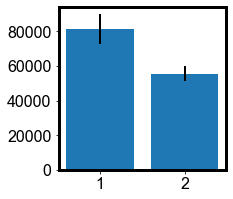

In [296]:
plt.figure(figsize =(3,3))
plt.bar([1,2],[RFPEx_d[exps['TJ1']].T.nlargest(3,0).mean()[0], RFPEx_l[exps['TJ1']].T.nlargest(3,0).mean()[0]], yerr = [RFPEx_d[exps['TJ1']].T.nlargest(3,0).std()[0], RFPEx_l[exps['TJ1']].T.nlargest(3,0).std()[0]])

In [306]:
[RFPEx_d[exps['TJ1']].T.nlargest(3,0).mean()[0]/RFPEx_l[exps['TJ1']].T.nlargest(3,0).mean()[0]]

[1.462562776290861]

In [297]:
p_x = [0.2,0.066666667,0.022222222,0.007407407,0.002469136,0.0002]

a_md = {}
a_sd = {}
a_ml = {}
a_sl = {}
for c in ['cL','cH']:
    a_md[c] = np.array([])
    a_sd[c] = np.array([])
    a_ml[c] = np.array([])
    a_sl[c] = np.array([])
    for i in range(1,7):
        try:
            a_md[c] = np.append(a_md[c],RFPEx_d[exps[c+'_'+str(i)]].T.nlargest(3,0).mean()[0] - RFPEx_d[exps['blank']].mean().mean())
            a_sd[c] = np.append(a_sd[c],(RFPEx_d[exps[c+'_'+str(i)]].T.nlargest(3,0).std()[0]**2 + RFPEx_d[exps['blank']].mean().std()**2)**0.5)
            a_ml[c] = np.append(a_ml[c],RFPEx_l[exps[c+'_'+str(i)]].T.nlargest(3,0).mean()[0] - RFPEx_l[exps['blank'][:-1]].mean().mean())
            a_sl[c] = np.append(a_sl[c],(RFPEx_l[exps[c+'_'+str(i)]].T.nlargest(3,0).std()[0]**2 + RFPEx_l[exps['blank'][:-1]].mean().std()**2)**0.5)
        except:
            pass

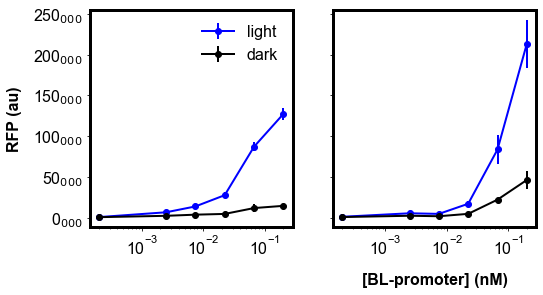

In [307]:
f,ax = plt.subplots(1,2, figsize = (8,4), sharey = True)

ax[0].errorbar(p_x,1.46*a_ml['cL'],yerr= a_sl['cL'],fmt='bo-')
ax[0].errorbar(p_x,a_md['cL'],yerr= a_sd['cL'],fmt='ko-')
ax[0].set_xscale('log')

ax[1].errorbar(p_x,1.46*a_ml['cH'],yerr= a_sl['cH'],fmt='bo-')
ax[1].errorbar(p_x,a_md['cH'],yerr= a_sd['cH'],fmt='ko-')
ax[1].set_xscale('log')


ax[0].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: '{:d}'.format(int(x/1000)) + '$_{000}$'))

ax[0].set_ylabel('RFP (au)',labelpad = ypad*1.1)
[ax[1].set_xlabel('[pDA312] (nM)',labelpad = xpad) for i in range(3)]
ax[0].legend(['light','dark'], frameon = False)
# plt.errorbar(p_x[1],1.2*a_ml['c0'],yerr= a_sl['c0'],fmt='go-')
# plt.errorbar(p_x[1],a_md['c0'],yerr= a_sd['c0'],fmt='go-')

#plt.xscale('log')


In [309]:
1.46*a_ml['cL']/a_md['cL']

array([8.87410737, 7.48962319, 6.20807278, 3.8885514 , 3.07092606,
       1.22995678])

In [310]:
1.46*a_ml['cH']/a_md['cH']

array([4.62884882, 3.80784549, 3.74617851, 2.82640432, 2.40420307,
       1.64179495])

In [87]:
path = 'activatable promoters/bl/txtl/cascade/'
file_d = path+'220425-BL-CRISPRa-pfbv4_dark.csv' # CSV file with raw data (open .txt in Excel, save as .csv)
file_l = path+'220425-BL-CRISPRa-pfbv4_light.csv' # CSV file with raw data (open .txt in Excel, save as .csv)

layout = path+'220425_BL-CRISPRa-pfbv4_PL.csv' # CSV file with plate layout

plate = pd.read_csv(layout, index_col = 0, dtype = str) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx_d = pd.read_csv(file_d, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows
RFPEx_l = pd.read_csv(file_l, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows


In [88]:
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append(i[0] + i[1])
            
exps

{'blank': ['A1', 'A2', 'B1', 'B2'],
 'pH_2': ['A4', 'B4', 'C4', 'D4'],
 'pH_5': ['A5', 'A6', 'A7', 'A8'],
 'pL_1': ['A9', 'A10', 'A11', 'A12'],
 'pH_1': ['B3', 'C2', 'C3', 'D3'],
 'pH_6': ['B5', 'B6', 'B7', 'B8'],
 'pL_2': ['B9', 'B10', 'B11', 'B12'],
 'TJ1': ['C1', 'D1', 'E1', 'F1'],
 'pL_3': ['C8', 'C10', 'C11', 'C12'],
 'pL_4': ['D9', 'D10', 'D11', 'D12'],
 'pH_3': ['E3', 'F3', 'G3', 'H3'],
 'pH_4': ['E4', 'F4', 'G4', 'H4'],
 'pL_5': ['E9', 'E10', 'E11', 'E12'],
 'pL_6': ['F9', 'F10', 'F11', 'F12']}

<BarContainer object of 2 artists>

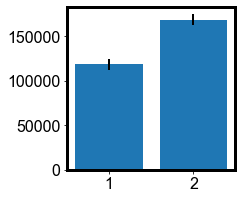

In [89]:
plt.figure(figsize =(3,3))
plt.bar([1,2],[RFPEx_d[exps['TJ1']].T.nlargest(3,0).mean()[0], RFPEx_l[exps['TJ1']].T.nlargest(3,0).mean()[0]], yerr = [RFPEx_d[exps['TJ1']].T.nlargest(3,0).std()[0], RFPEx_l[exps['TJ1']].T.nlargest(3,0).std()[0]])

In [90]:
p_x = [2,0.4,0.08,0.016,0.003,0.0001]

a_md = {}
a_sd = {}
a_ml = {}
a_sl = {}
for c in ['pL','pH']:
    a_md[c] = np.array([])
    a_sd[c] = np.array([])
    a_ml[c] = np.array([])
    a_sl[c] = np.array([])
    for i in range(1,7):
        try:
            a_md[c] = np.append(a_md[c],RFPEx_d[exps[c+'_'+str(i)]].T.nlargest(3,0).mean()[0] - RFPEx_d[exps['blank']].mean().mean())
            a_sd[c] = np.append(a_sd[c],(RFPEx_d[exps[c+'_'+str(i)]].T.nlargest(3,0).std()[0]**2 + RFPEx_d[exps['blank']].mean().std()**2)**0.5)
            a_ml[c] = np.append(a_ml[c],RFPEx_l[exps[c+'_'+str(i)]].T.nlargest(3,0).mean()[0] - RFPEx_l[exps['blank'][:-1]].mean().mean())
            a_sl[c] = np.append(a_sl[c],(RFPEx_l[exps[c+'_'+str(i)]].T.nlargest(3,0).std()[0]**2 + RFPEx_l[exps['blank'][:-1]].mean().std()**2)**0.5)
        except:
            pass

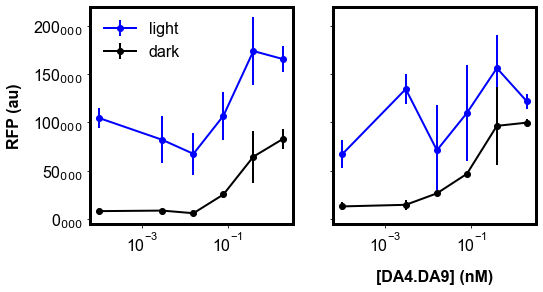

In [91]:
f,ax = plt.subplots(1,2, figsize = (8,4), sharey = True)

ax[0].errorbar(p_x,a_ml['pL'],yerr= a_sl['pL'],fmt='bo-')
ax[0].errorbar(p_x,a_md['pL'],yerr= a_sd['pL'],fmt='ko-')
ax[0].set_xscale('log')

ax[1].errorbar(p_x,a_ml['pH'],yerr= a_sl['pH'],fmt='bo-')
ax[1].errorbar(p_x,a_md['pH'],yerr= a_sd['pH'],fmt='ko-')
ax[1].set_xscale('log')


ax[0].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: '{:d}'.format(int(x/1000)) + '$_{000}$'))

ax[0].set_ylabel('RFP (au)',labelpad = ypad*1.1)
[ax[1].set_xlabel('[DA4.DA9] (nM)',labelpad = xpad) for i in range(3)]
ax[0].legend(['light','dark'], frameon = False)
# plt.errorbar(p_x[1],1.2*a_ml['c0'],yerr= a_sl['c0'],fmt='go-')
# plt.errorbar(p_x[1],a_md['c0'],yerr= a_sd['c0'],fmt='go-')

#plt.xscale('log')


In [92]:
a_ml

{'pL': array([165411.66666667, 173825.        , 106837.        ,  67452.33333333,
         81986.33333333, 104593.        ]),
 'pH': array([121734.        , 156143.66666667, 109741.66666667,  71175.        ,
        134472.        ,  67280.33333333])}

In [93]:
a_ml['pH'][-2]/a_ml['pH'][-1]

1.9986821309842897

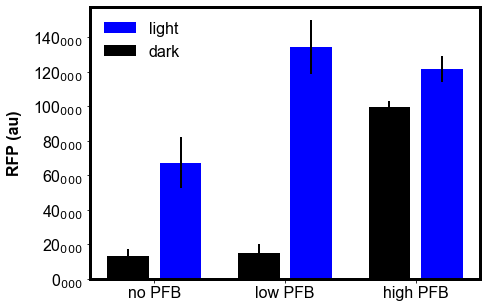

In [94]:
plt.figure(figsize=(7,5))
plt.bar([0],[0], color = 'b')
plt.bar([0,1,2.5,3.5,5,6], sum([[*[a_md['pH'][i],a_ml['pH'][i]]] for i in [5,4,0]],[]),yerr= sum([[*[a_sd['pH'][i],a_sl['pH'][i]]] for i in [5,4,0]],[]), color = 3*['k','b'] , alpha = 1)

plt.ylabel('RFP (au)',labelpad = ypad*1.1)
plt.legend(['light','dark'], frameon = False, loc = 'upper left')
plt.xticks([.5,3,5.5],['no PFB','low PFB', 'high PFB'])

#fc = a_ml['pH'][4]/a_ml['pH'][5]
#plt.text(-0.55,a_ml['pH'][5]*0.5,'{x:.{d}f}x'.format(x=fc, d=0))
#plt.annotate("", xy=(0, a_ml['pH'][5]), xytext=(0, a_ml['pH'][5]),arrowprops=dict(arrowstyle="<->"))



plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x,pos: '{:d}'.format(int(x/1000)) + '$_{000}$'))
plt.savefig('pfb.svg')

In [55]:
path = 'activatable promoters/bl/txtl/truncations/'
file_d = path+'220513-BL-pfb-tuncations-part1_dark.csv' # CSV file with raw data (open .txt in Excel, save as .csv)
file_l = path+'220513-BL-pfb-tuncations-part1_light.csv' # CSV file with raw data (open .txt in Excel, save as .csv)

file_d2 = path+'220516-BL-pfb-tuncations-part2_dark.csv' # CSV file with raw data (open .txt in Excel, save as .csv)
file_l2 = path+'220516-BL-pfb-tuncations-part2_light.csv' # CSV file with raw data (open .txt in Excel, save as .csv)

layout_d = path+'220512_BL-pfb-truncations-part1-dark_PL.csv' # CSV file with plate layout
layout_l = path+'220512_BL-pfb-truncations-part1-light_PL.csv' # CSV file with plate layout

layout_d2 = path+'220516_BL-pfb-truncations-p2-dark_PL.csv' # CSV file with plate layout
layout_l2 = path+'220516_BL-pfb-truncations-p2-light_PL.csv' # CSV file with plate layout

plate_d = pd.read_csv(layout_d, index_col = 0, dtype = str) # reads plate layout
plate_l = pd.read_csv(layout_l, index_col = 0, dtype = str) # reads plate layout
plate_d2 = pd.read_csv(layout_d2, index_col = 0, dtype = str) # reads plate layout
plate_l2 = pd.read_csv(layout_l2, index_col = 0, dtype = str) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx_d = pd.read_csv(file_d, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows
RFPEx_l = pd.read_csv(file_l, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows

RFPEx_d2 = pd.read_csv(file_d2, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows
RFPEx_l2 = pd.read_csv(file_l2, skiprows = 68, nrows = 1, na_values = 'OVRFLW', encoding = "ISO-8859-1") # reads raw data file at specified rows


In [56]:
labels = pd.unique(np.concatenate(plate_d.values))
exps_d = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate_d[plate_d.isin([l])].stack().index
        exps_d[l] = []
        for i in index:
            exps_d[l].append(i[0] + i[1])
            
labels = pd.unique(np.concatenate(plate_l.values))
exps_l = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate_l[plate_l.isin([l])].stack().index
        exps_l[l] = []
        for i in index:
            exps_l[l].append(i[0] + i[1])

labels = pd.unique(np.concatenate(plate_d2.values))
exps_d2 = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate_d2[plate_d2.isin([l])].stack().index
        exps_d2[l] = []
        for i in index:
            exps_d2[l].append(i[0] + i[1])
            
labels = pd.unique(np.concatenate(plate_l2.values))
exps_l2 = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate_l2[plate_l2.isin([l])].stack().index
        exps_l2[l] = []
        for i in index:
            exps_l2[l].append(i[0] + i[1])
exps_l2

{'blank': ['A1', 'B1', 'C1', 'D1'],
 'p17_1': ['A2', 'B2', 'C2', 'D2'],
 'p17_2': ['A3', 'B3', 'C3', 'D3'],
 'p17_3': ['A9', 'B9', 'C9', 'D9'],
 'p17_4': ['A10', 'B10', 'C10', 'D10'],
 'p17_5': ['A11', 'B11', 'C11', 'D11'],
 'p17_6': ['A12', 'B12', 'C12', 'D12'],
 'p13_1': ['E1', 'F1', 'G1', 'H1'],
 'p13_2': ['E2', 'F2', 'G2', 'H2', 'H10'],
 'p13_3': ['E3', 'F3', 'G3', 'H3'],
 'p13_4': ['E4', 'F4', 'G4', 'H4'],
 'p13_5': ['E5', 'F5', 'G5', 'H5'],
 'BL': ['E11', 'F11', 'G11', 'H11'],
 'TJ1': ['E12', 'F12', 'G12', 'H12']}

In [70]:
x_bl = [0.2,0.067,0.022,0.007,0.002,0]

a_md = {}
a_sd = {}
a_ml = {}
a_sl = {}

for e in ['p20','p17','p13','TJ1','BL']:
    a_md[e] = np.array([])
    a_sd[e] = np.array([])
    a_ml[e] = np.array([])
    a_sl[e] = np.array([])
    
    for c in exps_d:
        if e in c:
            a_md[e] = np.append(a_md[e],RFPEx_d[exps_d[c]].T.nlargest(3,0).mean()[0] - RFPEx_d[exps_d['blank'][:-1]].mean().mean())
            a_sd[e] = np.append(a_sd[e],(RFPEx_d[exps_d[c]].T.nlargest(3,0).std()[0]**2 + RFPEx_d[exps_d['blank'][:-1]].mean().std()**2)**0.5)
            a_ml[e] = np.append(a_ml[e],RFPEx_l[exps_l[c]].T.nlargest(3,0).mean()[0] - RFPEx_l[exps_l['blank']].mean().mean())
            a_sl[e] = np.append(a_sl[e],(RFPEx_l[exps_l[c]].T.nlargest(3,0).std()[0]**2 + RFPEx_l[exps_l['blank']].mean().std()**2)**0.5)

    for c in exps_d2:
        if e in c:
            a_md[e] = np.append(a_md[e],RFPEx_d2[exps_d2[c]].T.nlargest(3,0).mean()[0] - RFPEx_d2[exps_d2['blank'][:-1]].mean().mean())
            a_sd[e] = np.append(a_sd[e],(RFPEx_d2[exps_d2[c]].T.nlargest(3,0).std()[0]**2 + RFPEx_d2[exps_d2['blank'][:-1]].mean().std()**2)**0.5)
            a_ml[e] = np.append(a_ml[e],RFPEx_l2[exps_l2[c]].T.nlargest(3,0).mean()[0] - RFPEx_l2[exps_l2['blank']].mean().mean())
            a_sl[e] = np.append(a_sl[e],(RFPEx_l2[exps_l2[c]].T.nlargest(3,0).std()[0]**2 + RFPEx_l2[exps_l2['blank']].mean().std()**2)**0.5)
            
a_md['p13'] = np.append(a_md['p13'],a_md['p17'][-1])
a_sd['p13'] = np.append(a_sd['p13'],a_sd['p17'][-1])
a_ml['p13'] = np.append(a_ml['p13'],a_ml['p17'][-1])
a_sl['p13'] = np.append(a_sl['p13'],a_sl['p17'][-1])      

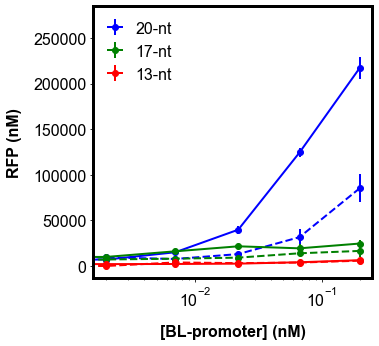

In [83]:
plt.figure(figsize = (5,5))
plt.errorbar(x_bl,a_md['p20'], yerr = a_sd['p20'],fmt='bo--')
plt.errorbar(x_bl,a_ml['p20'], yerr = a_sl['p20'],fmt='bo-', label = '20-nt')

plt.errorbar(x_bl,a_md['p17'], yerr = a_sd['p17'],fmt='go--')
plt.errorbar(x_bl,a_ml['p17'], yerr = a_sl['p17'],fmt='go-', label = '17-nt')

plt.errorbar(x_bl,a_md['p13'], yerr = a_sd['p13'],fmt='ro--')
plt.errorbar(x_bl,a_ml['p13'], yerr = a_sl['p13'],fmt='ro-', label = '13-nt')

plt.xscale('log')
plt.xlabel('[BL-promoter] (nM)',labelpad = xpad)
plt.ylabel('RFP (nM)',labelpad = 1.1*ypad)
plt.ylim((-13522.001801112627, 284654.375029473))
#plt.xlim((0.0004993963679968575, 0.8410153275336657))
plt.legend(frameon = False, handlelength = 0.9)